# Comparison of quality metrics of binary classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

To calculate the quality metrics in supervised learning task, you need to know only two vectors: the vector of correct answers and the vector of predicted values; we will denote them actual and predicted. The actual vector is known from the training set, the predicted vector is returned by the prediction algorithm.

Let's consider different prediction vectors.

In our formulation, actual consists of zeros and ones, and predicted is from values ​​from the interval [0, 1] (probabilities of class 1). Such vectors are conveniently shown on the scatter plot.

To make the final prediction (already binary), you need to set the threshold T: all objects that have a prediction above the threshold are assigned to class 1, the rest to class 0.

In [2]:
# 1 scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])

# many scatter plots
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

Ideal situation: there is a threshold T that correctly separates the probabilities corresponding to two classes.

In [3]:
actual_0 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0 = np.array([ 0.19015288,  0.23872404,  0.42707312,  0.15308362,  0.2951875 ,
            0.23475641,  0.17882447,  0.36320878,  0.33505476,  0.202608  ,
            0.82044786,  0.69750253,  0.60272784,  0.9032949 ,  0.86949819,
            0.97368264,  0.97289232,  0.75356512,  0.65189193,  0.95237033,
            0.91529693,  0.8458463 ])

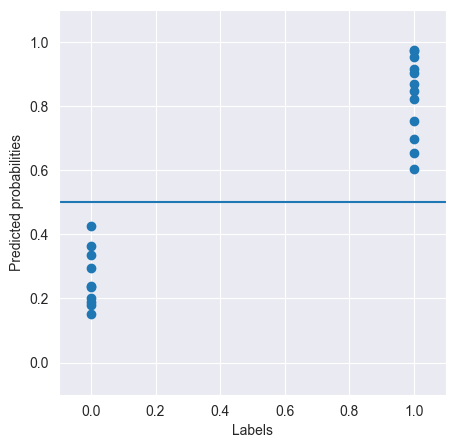

In [4]:
plt.figure(figsize=(5, 5))
scatter(actual_0, predicted_0, 0.5)

The probability intervals for the two classes are perfectly separated by the threshold T = 0.5.

Most often, the intervals are imposed - then you need to carefully select the threshold.

The most incorrect algorithm does the opposite: it raises the probabilities of class 0 above the probabilities of class 1. If this happens, it’s worth to see if the labels 0 and 1 are not messed up when creating the target vector from raw data.

Examples:

In [5]:
actual_1 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                    1.,  1.,  1.,  1.])
predicted_1 = np.array([ 0.41310733,  0.43739138,  0.22346525,  0.46746017,  0.58251177,
            0.38989541,  0.43634826,  0.32329726,  0.01114812,  0.41623557,
            0.54875741,  0.48526472,  0.21747683,  0.05069586,  0.16438548,
            0.68721238,  0.72062154,  0.90268312,  0.46486043,  0.99656541,
            0.59919345,  0.53818659,  0.8037637 ,  0.272277  ,  0.87428626,
            0.79721372,  0.62506539,  0.63010277,  0.35276217,  0.56775664])
actual_2 = np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
predicted_2 = np.array([ 0.07058193,  0.57877375,  0.42453249,  0.56562439,  0.13372737,
            0.18696826,  0.09037209,  0.12609756,  0.14047683,  0.06210359,
            0.36812596,  0.22277266,  0.79974381,  0.94843878,  0.4742684 ,
            0.80825366,  0.83569563,  0.45621915,  0.79364286,  0.82181152,
            0.44531285,  0.65245348,  0.69884206,  0.69455127])

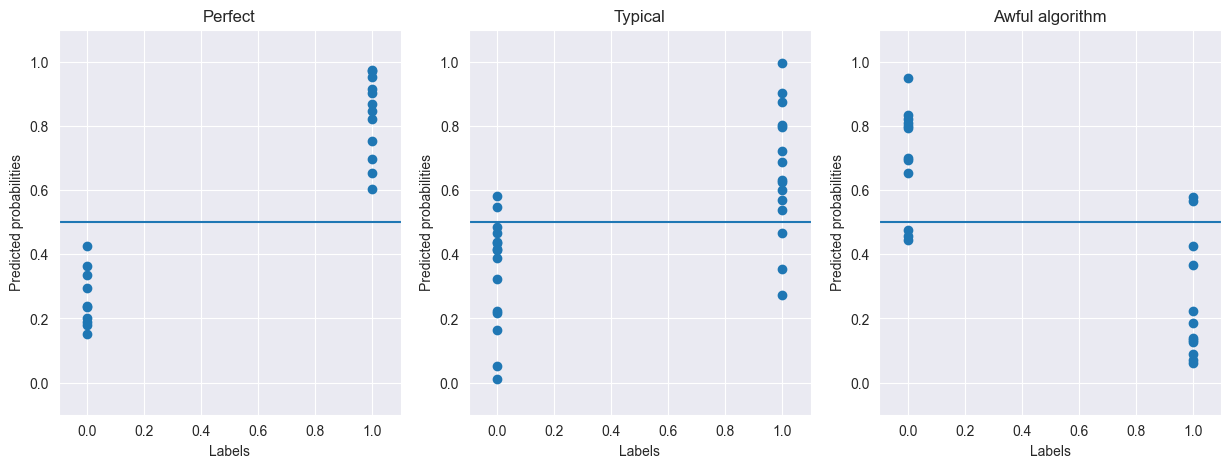

In [6]:
many_scatters([actual_0, actual_1, actual_2], [predicted_0, predicted_1, predicted_2],
              [0.5, 0.5, 0.5], ["Perfect", "Typical", "Awful algorithm"], (1, 3))

The algorithm can be cautious and strive not to strongly deviate the probabilities from 0.5, and it can take the risk of making the predictions close to zero or one.

In [7]:
# risky ideal
actual_0r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0r = np.array([ 0.23563765,  0.16685597,  0.13718058,  0.35905335,  0.18498365,
            0.20730027,  0.14833803,  0.18841647,  0.01205882,  0.0101424 ,
            0.10170538,  0.94552901,  0.72007506,  0.75186747,  0.85893269,
            0.90517219,  0.97667347,  0.86346504,  0.72267683,  0.9130444 ,
            0.8319242 ,  0.9578879 ,  0.89448939,  0.76379055])
# risky good
actual_1r = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_1r = np.array([ 0.13832748,  0.0814398 ,  0.16136633,  0.11766141,  0.31784942,
            0.14886991,  0.22664977,  0.07735617,  0.07071879,  0.92146468,
            0.87579938,  0.97561838,  0.75638872,  0.89900957,  0.93760969,
            0.92708013,  0.82003675,  0.85833438,  0.67371118,  0.82115125,
            0.87560984,  0.77832734,  0.7593189,  0.81615662,  0.11906964,
            0.18857729])

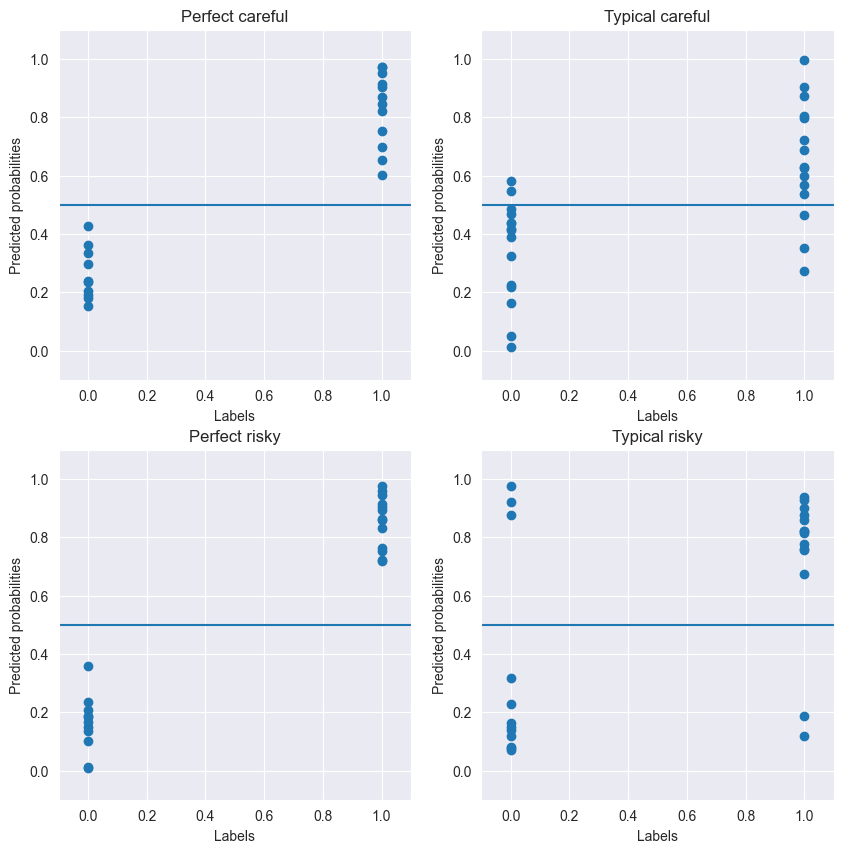

In [8]:
many_scatters([actual_0, actual_1, actual_0r, actual_1r],
              [predicted_0, predicted_1, predicted_0r, predicted_1r],
              [0.5, 0.5, 0.5, 0.5],
              ["Perfect careful", "Typical careful", "Perfect risky", "Typical risky"],
              (2, 2))

Intervals can be shifted. If the algorithm is afraid of false-positive errors, then it will often make predictions close to zero.
Similarly, to avoid false negative errors, it is logical to more often predict high probabilities.

In [9]:
actual_10 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                1.,  1.,  1.])
predicted_10 = np.array([ 0.29340574, 0.47340035,  0.1580356 ,  0.29996772,  0.24115457,  0.16177793,
                         0.35552878,  0.18867804,  0.38141962,  0.20367392,  0.26418924, 0.16289102,
                         0.27774892,  0.32013135,  0.13453541, 0.39478755,  0.96625033,  0.47683139,
                         0.51221325,  0.48938235, 0.57092593,  0.21856972,  0.62773859,  0.90454639,  0.19406537,
                         0.32063043,  0.4545493 ,  0.57574841,  0.55847795 ])
actual_11 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_11 = np.array([ 0.35929566, 0.61562123,  0.71974688,  0.24893298,  0.19056711,  0.89308488,
            0.71155538,  0.00903258,  0.51950535,  0.72153302,  0.45936068,  0.20197229,  0.67092724,
                         0.81111343,  0.65359427,  0.70044585,  0.61983513,  0.84716577,  0.8512387 ,
                         0.86023125,  0.7659328 ,  0.70362246,  0.70127618,  0.8578749 ,  0.83641841,
                         0.62959491,  0.90445368])

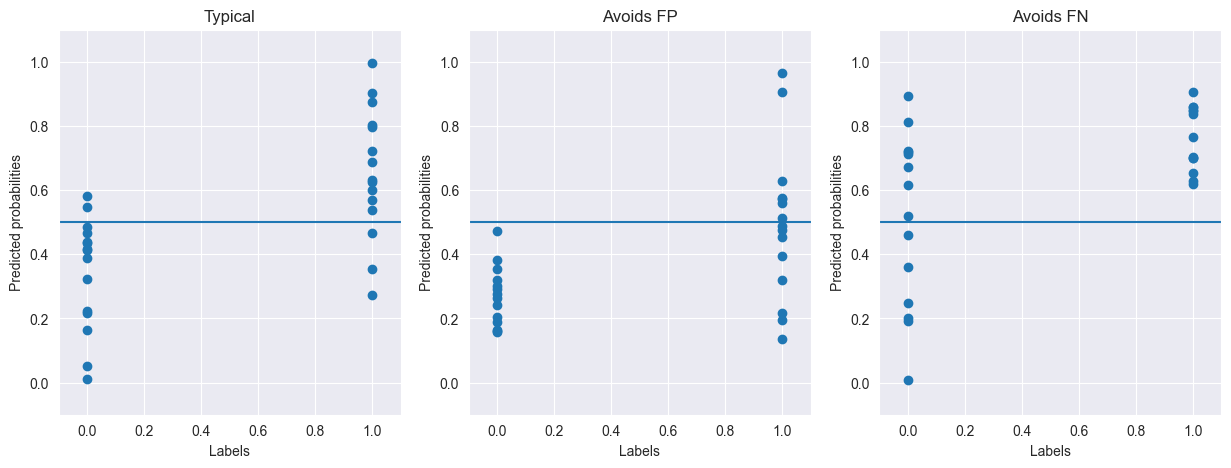

In [10]:
many_scatters([actual_1, actual_10, actual_11], [predicted_1, predicted_10, predicted_11],
              [0.5, 0.5, 0.5], ["Typical", "Avoids FP", "Avoids FN"], (1, 3))

### Metrics that evaluate binary prediction vectors

There are two typical situations where machine learning experts begin to study the characteristics of quality metrics:
1. when participating in a competition or solving an applied problem, when the vector of predictions is estimated by a specific metric, and it is necessary to construct an algorithm that maximizes this metric.
1. at the stage of formalizing the problem of machine learning, when there are requirements of the applied area, and you need to offer a mathematical metric that will meet these requirements.

Next, we briefly review each metric from these two positions.

#### Precision and recall; accuracy

They evaluate the quality after binarization by the threshold T, that is, comparing two binary vectors: actual and predicted.

Two popular metrics are precision and recall. The first shows how often the algorithm predicts class 1 and turns out to be right, and the second shows how many objects of class 1 the algorithm has found.

Also consider the most simple and well-known metric - accuracy; it shows the proportion of correct answers.


In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [12]:
T = 0.5
print ("Different quality algs:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2],
                                    [predicted_0 > T, predicted_1 > T, predicted_2 > T],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print (descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))
print()
print ("Risky and careful:")
for actual, predicted, descr in zip([actual_1, actual_1r],
                                    [predicted_1 > T, predicted_1r > T],
                                    ["Typical careful:", "Typical risky:"]):
    print (descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))
print()
print ("Different sensitivity to FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11],
                                    [predicted_10 > T, predicted_11 > T],
                                    ["Avoids FP:", "Avoids FN:"]):
    print (descr, "precision =", precision_score(actual, predicted), "recall =", \
        recall_score(actual, predicted), ";",\
        "accuracy =", accuracy_score(actual, predicted))

Different quality algs:
Perfect: precision = 1.0 recall = 1.0 ; accuracy = 1.0
Typical: precision = 0.8571428571428571 recall = 0.8 ; accuracy = 0.8333333333333334
Awful: precision = 0.18181818181818182 recall = 0.16666666666666666 ; accuracy = 0.20833333333333334

Risky and careful:
Typical careful: precision = 0.8571428571428571 recall = 0.8 ; accuracy = 0.8333333333333334
Typical risky: precision = 0.8 recall = 0.8571428571428571 ; accuracy = 0.8076923076923077

Different sensitivity to FP и FN:
Avoids FP: precision = 1.0 recall = 0.4666666666666667 ; accuracy = 0.7241379310344828
Avoids FN: precision = 0.6190476190476191 recall = 1.0 ; accuracy = 0.7037037037037037


All three metrics easily distinguish simple cases of good and bad algorithms. Note that metrics have a range of [0, 1], and therefore they are easy to interpret.

The metrics do not care about the values ​​of probabilities, they only care about how many objects went wrong beyond the set limit (in this case, T = 0.5).

The accuracy metric gives the same weight to false positive and false negative errors, but a pair of precision and recall metrics uniquely identifies this difference. Actually, they are used in order to control the errors of FP and FN.

We measured three metrics, fixing the threshold T = 0.5, because it seems optimal for almost all pictures. Let's look at the last (most interesting for these metrics) group of vectors, how precision and recall change as the threshold increases.

In [13]:
from sklearn.metrics import precision_recall_curve

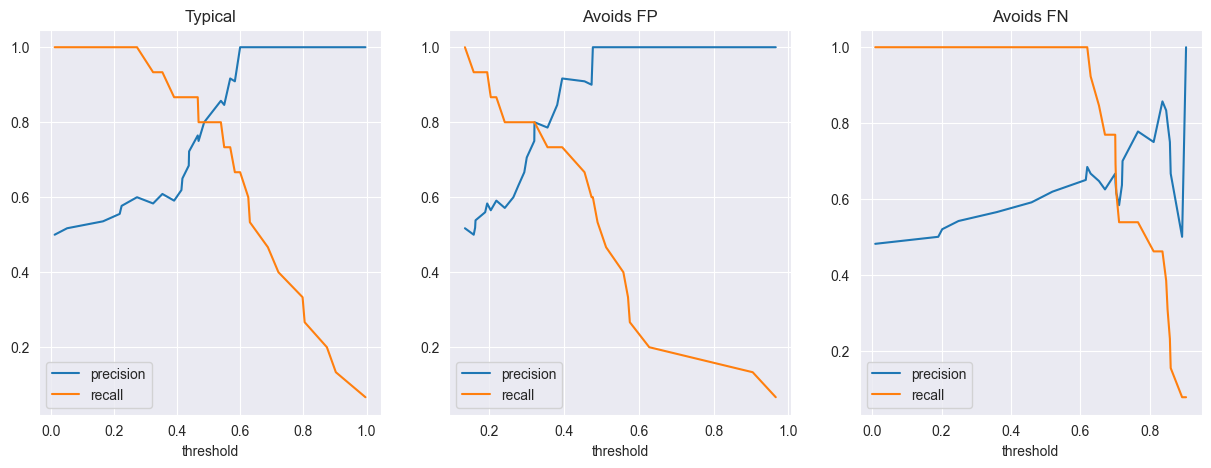

In [14]:
precs = []
recs = []
threshs = []
labels = ["Typical", "Avoids FP", "Avoids FN"]
for actual, predicted in zip([actual_1, actual_10, actual_11],
                                    [predicted_1, predicted_10, predicted_11]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

As the threshold increases, we make fewer FP errors and more FN errors, so one of the curves increases, and the second falls. According to this schedule, you can choose the optimal threshold value at which precision and recall will be acceptable. If there is no such threshold, you need to train another algorithm.

Let's say that the acceptable values ​​of precision and recall are determined by the subject area. For example, in the task of determining whether a patient is ill with a particular disease (0 is healthy, 1 is sick), false negative errors are avoided by requiring recall of about 0.9. You can tell a person that he is sick, and with further diagnostics to identify an error; much worse to miss the presence of the disease.

#### F1-score

The obvious disadvantage of a pair of precision-recall metrics is that there are two of them: it’s not clear how to compare the algorithms. To avoid this, use the F1-metric, which is equal to the average harmonic precision and recall.
The F1 metric will be equal to 1 if and only if precision = 1 and recall = 1 (the ideal algorithm).

It is difficult to deceive F1: if one of the quantities is small and the other is close to 1 (graphs show that such a ratio is sometimes easy to get), F1 will be far from 1. F1-metric is difficult to optimize, because for this you need to achieve high completeness and accuracy at the same time.

For example, let's calculate F1 for the same set of vectors for which we built graphs (we remember that there one of the curves quickly goes to unity)

In [15]:
from sklearn.metrics import f1_score

In [16]:
T = 0.5
print ("Different sensitivity to FP и FN:")
for actual, predicted, descr in zip([actual_1, actual_10, actual_11],
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T],
                                    ["Typical:", "Avoids FP:", "Avoids FN:"]):
    print (descr, "f1 =", f1_score(actual, predicted))

Different sensitivity to FP и FN:
Typical: f1 = 0.8275862068965517
Avoids FP: f1 = 0.6363636363636364
Avoids FN: f1 = 0.7647058823529411


The F1-metric in the last two cases, when one of the paired metrics is equal to 1, is significantly less than in the first balanced case.

### Metrics estimating probability vectors of class 1

These metrics are convenient to interpret, but when using them we do not take into account most of the information obtained from the algorithm. In some tasks, probabilities are needed in a pure form, for example, if we predict whether a team will win in a football match, and the probability value affects the size of the stake for this team. Even if in the end we still binarize the prediction, I want to follow the character of the probability vector.

#### Log_loss

Log_loss calculates the likelihood of the labels in actual with the probabilities from predicted, taken with the opposite sign:

$ log\_loss (actual, predicted) = - \frac 1 n \sum_ {i = 1} ^ n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i)) $ , $ n $ is the length of vectors.

Accordingly, this metric needs to be minimized.

Let's calculate it on our vectors:

In [17]:
from sklearn.metrics import log_loss

In [18]:
print ("Different quality algs:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2],
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print (descr, log_loss(actual, predicted))
print()
print ("Risky and careful:")
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r],
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal risky", "Typical careful:", "Typical risky:"]):
    print (descr, log_loss(actual, predicted))
print()
print ("Different sensitivity to FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11],
                                    [predicted_10, predicted_11],
                                    ["Avoids FP:", "Avoids FN:"]):
    print (descr, log_loss(actual, predicted))

Different quality algs:
Perfect: 0.24921263759186213
Typical: 0.4645068222557676
Awful: 1.5270248809234201

Risky and careful:
Ideal careful 0.24921263759186213
Ideal risky 0.17061947914666056
Typical careful: 0.4645068222557676
Typical risky: 0.6138745922344455

Different sensitivity to FP и FN:
Avoids FP: 0.5849339709893446
Avoids FN: 0.5886791288814904


Like the previous metrics, log_loss distinguishes between perfect, typical and bad cases well. But note that it is quite difficult to interpret the value: the metric does not reach zero and never has an upper limit. Therefore, even for an ideal algorithm, if you look at only one value of log_loss, it is impossible to understand that it is perfect.

But this metric distinguishes between careful and risky algorithms. As we saw above, in the cases of Typical careful and Typical risky the number of errors in binarization at T = 0.5 is about the same, in cases of Ideal there are no errors at all. However, for the unsuccessfully guessed classes in Typical, the risky algorithm has to pay a large increase in log_loss than a cautious algorithm. On the other hand, for successfully guessed classes, the risky perfect algorithm gets less log_loss than a careful perfect algorithm.

Thus, log_loss is sensitive to both probabilities close to 0 and 1, and probabilities close to 0.5.

FP and FN errors cannot be distinguished by ordinary Log_loss.

However, it is not difficult to make a generalization of log_loss to the case when it is necessary to penalize FP or FN more: for this, it suffices to add a convex (that is, non-negative and summing to unity) combination of two coefficients to the likelihood term. For example, let's penalize false positive:

$ weighted\_log\_loss (actual, predicted) = - \frac 1 n \sum_ {i = 1} ^ n (0.3 \, \cdot actual_i \cdot \log (predicted_i) + 0.7 \, \cdot (1-actual_i ) \cdot \log (1-predicted_i)) $

If the algorithm incorrectly predicts a high probability of the first class, that is, the object actually belongs to class 0, then the first term in parentheses is zero, and the second is taken into account with greater weight.

#### ROC and AUC

When constructing the ROC curve (receiver operating characteristic), the binarization threshold of the probability vector is varied, and values ​​depending on the number of errors FP and FN are calculated. These values ​​are set so that in the case when there is a threshold for an ideal separation of classes, the ROC curve passes through a certain point - the upper left corner of the square [0, 1] x [0, 1]. In addition, it always passes through the lower left and upper right corners. It turns out visual visualization of the quality of the algorithm. In order to characterize this visualization numerically, we introduced the concept of AUC - the area under the ROC curve.


Let's build ROC curves for our tasks:

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

Perfect:1.000000 Typical:0.884444 Awful:0.041667 Ideal careful:1.000000 
Ideal Risky:1.000000 
Typical careful:0.884444 
Typical risky:0.738095 
Typical:0.884444 Avoids FP:0.819048 Avoids FN:0.780220 


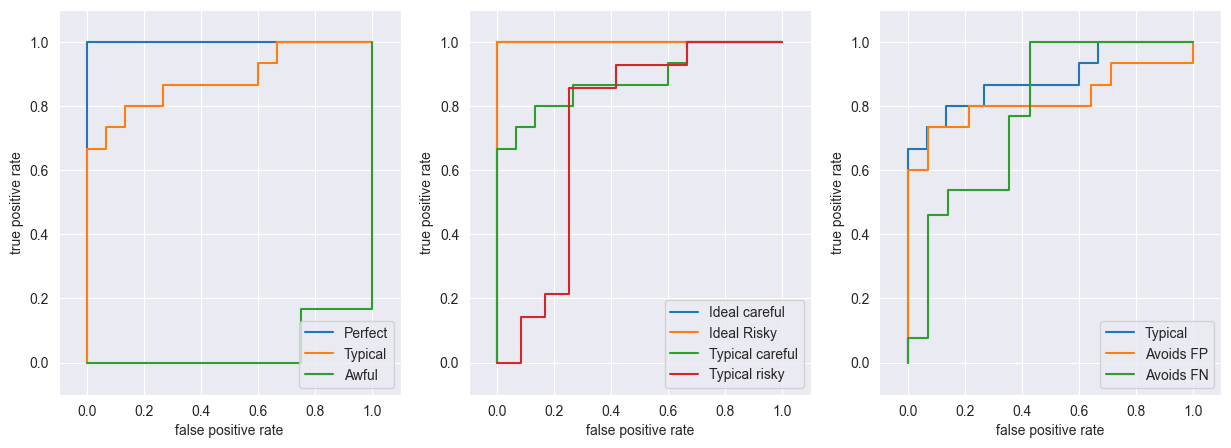

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
aucs = ""
for actual, predicted, descr in zip([actual_0, actual_1, actual_2],
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect", "Typical", "Awful"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 2)
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r],
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal Risky", "Typical careful", "Typical risky"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " \n"
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 3)
for actual, predicted, descr in zip([actual_1, actual_10, actual_11],
                                    [predicted_1, predicted_10, predicted_11],
                                    ["Typical", "Avoids FP", "Avoids FN"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
print (aucs)

The more objects in the sample, the smoother the curve looks (although in reality it is still stepped).

As expected, the curves of all ideal algorithms pass through the upper left corner. The first graph also shows a typical ROC curve (usually, in practice, they do not reach the “ideal” angle).

The AUC of the risk algorithm is significantly less than that of a cautious one, although careful and risking ideal algorithms do not differ in ROC or AUC. Therefore, to strive to increase the gap between the probability intervals of the classes does not make sense.

There is a distortion of the curve in the case when the algorithm has FP or FN errors. However, it is impossible to track this by the value of AUC (the curves can be symmetric about the diagonal (0, 1) - (1, 0)).

After the curve has been plotted, it is convenient to choose a binarization threshold in which a compromise will be reached between FP or FN. The threshold corresponds to a point on the curve. If we want to avoid FP errors, we need to choose a point on the left side of the square (as high as possible), if FN is a point on the upper side of the square (as left as possible). All intermediate points will correspond to different proportions of FP and FN.

### Conclusion
We looked at several binary classification metrics. Some of them, for example, log_loss, are generalized to a multi-class case. If the metric is difficult to generalize as a formula, the multi-class classification problem is considered as a set of problems of binary classification and then the metric is averaged in special ways (for example, micro and macro averaging).

In practice, it is always useful to visualize the vectors that your algorithm produces, in order to understand what errors it makes at different thresholds and how the metric responds to the prediction vectors produced.